In [1]:
'''
1. Are the last 5 measurements on a steady increase? (does not have to be consecutive increases)
- Take the difference of the last 5 temperatures and if the sum is at least +20, 
  the temperature has increased by 20 in the last 5 measurements.

2. Alert levels:
    red - top and bottom 10%
    yellow - 15%
    green - inner 50%
    outlier - outside this range
'''

'\n1. Are the last 5 measurements on a steady increase? (does not have to be consecutive increases)\n- Take the difference of the last 5 temperatures and if the sum is at least +20, \n  the temperature has increased by 20 in the last 5 measurements.\n\n2. Alert levels:\n    red - top and bottom 10%\n    yellow - 15%\n    green - inner 50%\n    outlier - outside this range\n'

In [15]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import time
import pylab as pl
from IPython import display

Text(0, 0.5, 'Temperature')

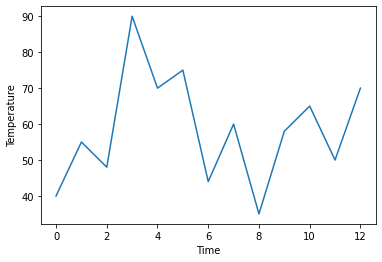

In [3]:
# custom temperature values for experimenting
temperatures = [40, 55, 48, 90, 70, 75, 44, 60, 35, 58, 65, 50, 70]

# plot temperatures
plt.plot(temperatures)
plt.xlabel('Time')
plt.ylabel('Temperature')

In [5]:
# create a list for timestamps
time = 800
timestamps = []
temperatures = [70, 60, 55, 70, 62, 78, 62, 60, 44, 65, 65, 64, 55, 72, 80, 80, 74, 70]
n = len(temperatures)
for _ in range(n):
    timestamps.append(time)

    time += 5
    # move to the next hour after 60 minutes
    hour = (time // 100) * 100
    minute = time - hour
    if minute >= 60:
        time += 40
        
print(timestamps)

[800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 900, 905, 910, 915, 920, 925]


Text(0, 0.5, 'Temperature')

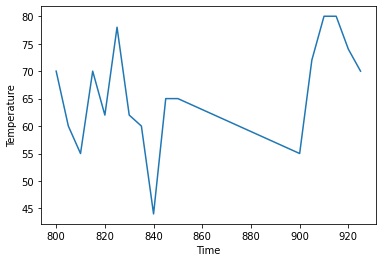

In [6]:
# Steady Increase?

# custom temperature values for experimenting
temperatures = [70, 60, 55, 70, 62, 78, 62, 60, 44, 65, 65, 64, 55, 72, 80, 80, 74, 70]

# plot temperatures
plt.plot(timestamps, temperatures)
plt.xlabel('Time')
plt.ylabel('Temperature')

In [7]:
n = len(temperatures)
total = 0
# for 5 consecutive temps, queue holds at most 4 temp differences
# sum of the differences in the queue tells whether temp is increasing or decreasing
sum_queue = deque()
for i in range(1, n):
    if i >= 5:
        total -= sum_queue.popleft()
    curr_temp = temperatures[i]
    last_temp = temperatures[i-1]
    diff = curr_temp - last_temp
    total += diff
    if total >= 20 or total <= -20:
        print("Alert!")
        print(i, temperatures[i])
        print(i - 4, temperatures[i-4])
    sum_queue.append(diff)


In [69]:
# Alert levels

# out of bounds - if temp is less than or more than median +- 2xSD
# Red - if temp is less than 10 percentile or more than 90 percentile
# Yellow - if temp is less than 25 percentile or more than 75 percentile
# Green - if temp is between 25 percentile and 75 percentile

# https://www.calculatorsoup.com/calculators/statistics/percentile-calculator.php

color_map = {"Red": "red", "Yellow": "yellow", "Green": "green", "Out of Bounds": "magenta"}
def classify_temp(temp, metrics):
    # unpacking metrics
    median = metrics["median"]
    sd = metrics["sd"]
    lower_bound = metrics["lower_bound"]
    upper_bound = metrics["upper_bound"]
    ninety_pct = metrics["ninety_pct"]
    ten_pct = metrics["ten_pct"]
    seventy_five_pct = metrics["seventy_five_pct"]
    twenty_five_pct = metrics["twenty_five_pct"]
    
    if temp < lower_bound or temp > upper_bound:
        return "Out of Bounds"
    elif temp < ten_pct or temp > ninety_pct:
        return "Red"
    elif temp < twenty_five_pct or temp > seventy_five_pct:
        return "Yellow"
    else:
        return "Green"

temperatures = [70, 60, 55, 70, 62, 78, 62, 60, 44, 65, 65, 64, 55, 72, 80, 80, 74, 70]
metrics = {}
metrics["median"] = np.percentile(temperatures, 50)
metrics["sd"] = np.std(temperatures)
metrics["lower_bound"] = metrics["median"] - 2 * metrics["sd"]
metrics["upper_bound"] = metrics["median"] + 2 * metrics["sd"]
metrics["ninety_pct"] = np.percentile(temperatures, 90)
metrics["ten_pct"] = np.percentile(temperatures, 10)
metrics["seventy_five_pct"] = np.percentile(temperatures, 75)
metrics["twenty_five_pct"] = np.percentile(temperatures, 25)

# temp = float(input("Enter a temperature: "))
# print(classify_temp(temp, metrics))

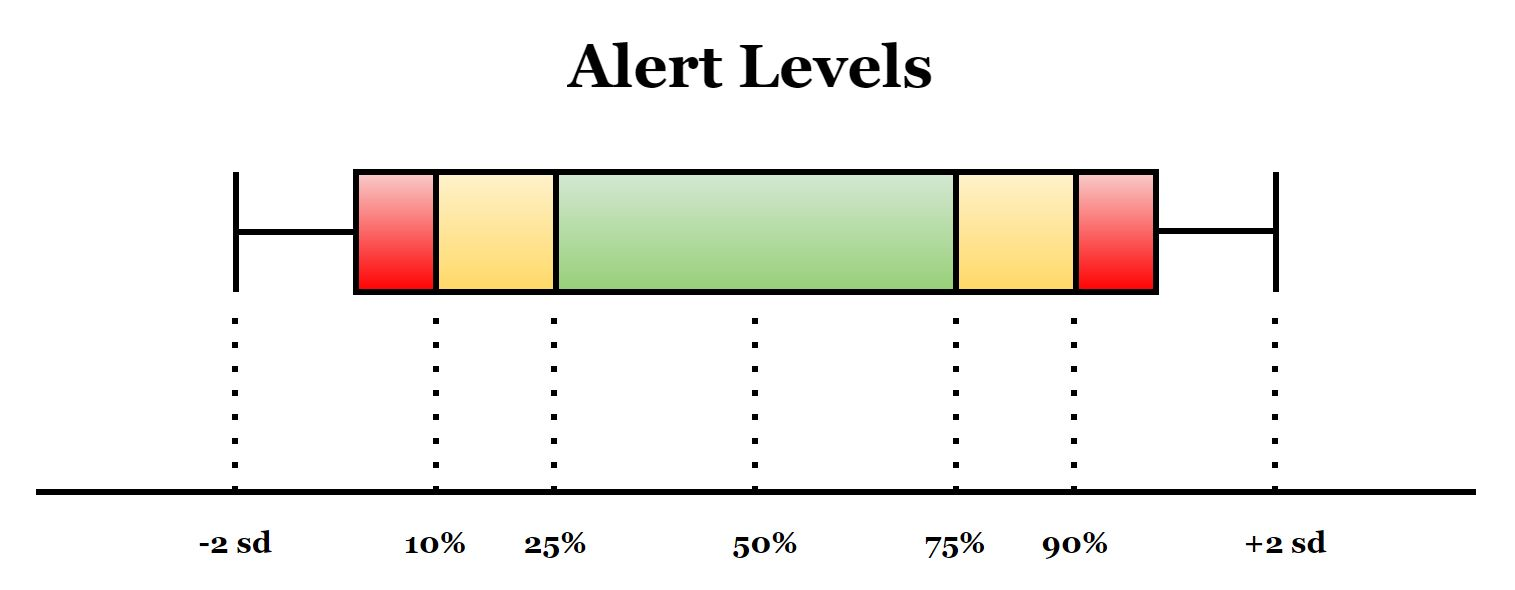

In [70]:
# printing metrics
median = round(metrics["median"], 2)
sd = round(metrics["sd"], 2)
lower_bound = round(metrics["lower_bound"])
upper_bound = round(metrics["upper_bound"])
ninety_pct = round(metrics["ninety_pct"])
ten_pct = round(metrics["ten_pct"])
seventy_five_pct = round(metrics["seventy_five_pct"])
twenty_five_pct = round(metrics["twenty_five_pct"])

print("Median:", median)
print("Standard Deviation:", sd)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Ninety Percentile:", ninety_pct)
print("Ten Percentile:", ten_pct)
print("Seventy Five percentile:", seventy_five_pct)
print("Twenty Five percentile:", twenty_five_pct)

Median: 65.0
Standard Deviation: 9.19
Lower Bound: 47
Upper Bound: 83
Ninety Percentile: 79
Ten Percentile: 55
Seventy Five percentile: 72
Twenty Five percentile: 60


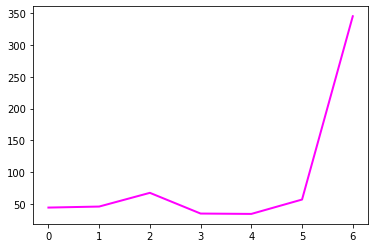

Alert level for 345.657 degrees: Out of Bounds!
Change in temperature by 288.99 degrees


In [ ]:
# testing user input and determining alert levels
%matplotlib inline

n = 10
new_temps = []
queue = deque()  # double-ended queue that stores the last 5 differences in temperature
total = 0
# for 5 consecutive temps, queue holds at most 4 temp differences
# sum of the differences in the queue tells whether temp is increasing or decreasing
for i in range(n):
    temp = float(input("Enter a temperature: "))
    new_temps.append(temp)
    
    # plot new temperature value
    alert_level = classify_temp(temp, metrics)
    color = color_map[alert_level]
    pl.clf()
    pl.plot(new_temps, color, linewidth=2)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print(f"Alert level for {temp} degrees: {alert_level}!")

    # check for steady increase (+20) or decrease (-20) in last five temperatures
    if i == 0:  # skip the first temp
        continue
    if i >= 5:  # after encountering 5 temps remove 5th last temp difference from the queue
        total -= queue.popleft()
    curr_temp = new_temps[i]
    last_temp = new_temps[i-1]
    diff = curr_temp - last_temp
    total += diff
    print(f"Change in temperature by {round(diff, 2)} degrees")
    if i >= 4 and (total >= 20 or total <= -20):
        direction = "increased" if total >= 20 else "decreased"
        print(f"WARNING: Temperature has {direction} by at least 20 degrees in the last 5 measurements")
    queue.append(diff)
    